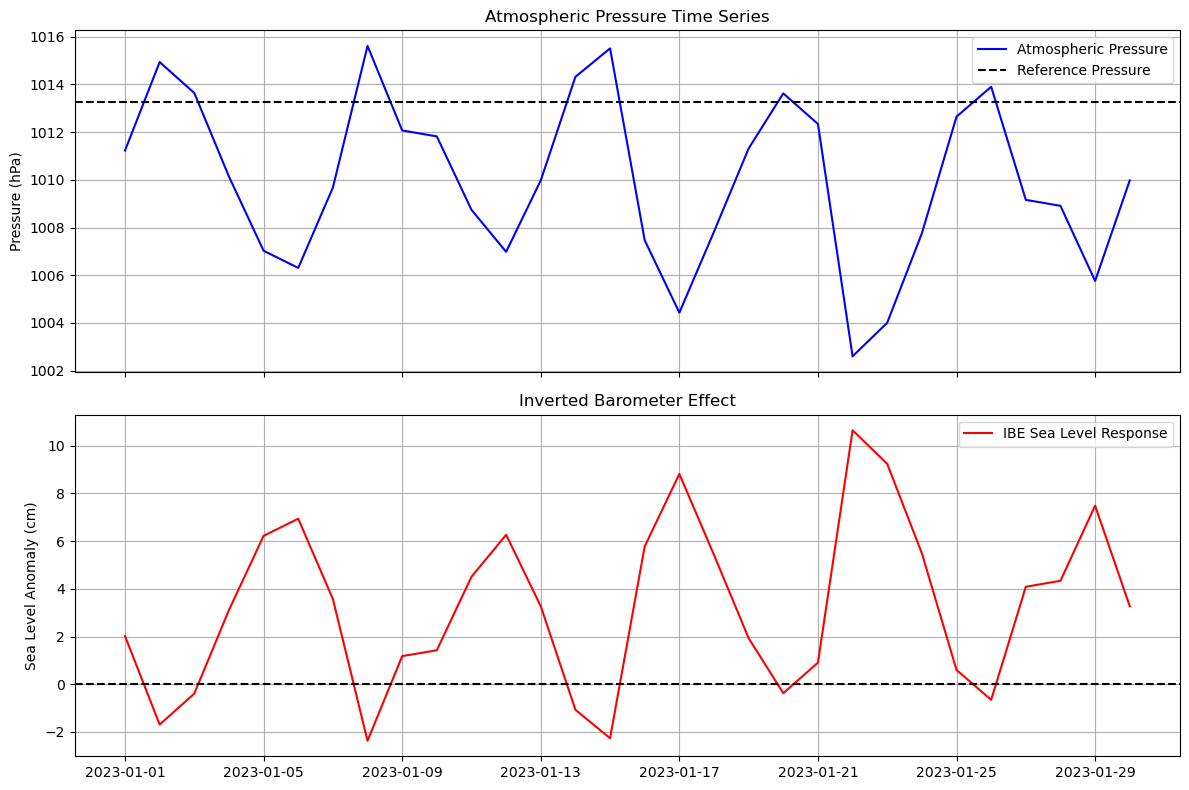

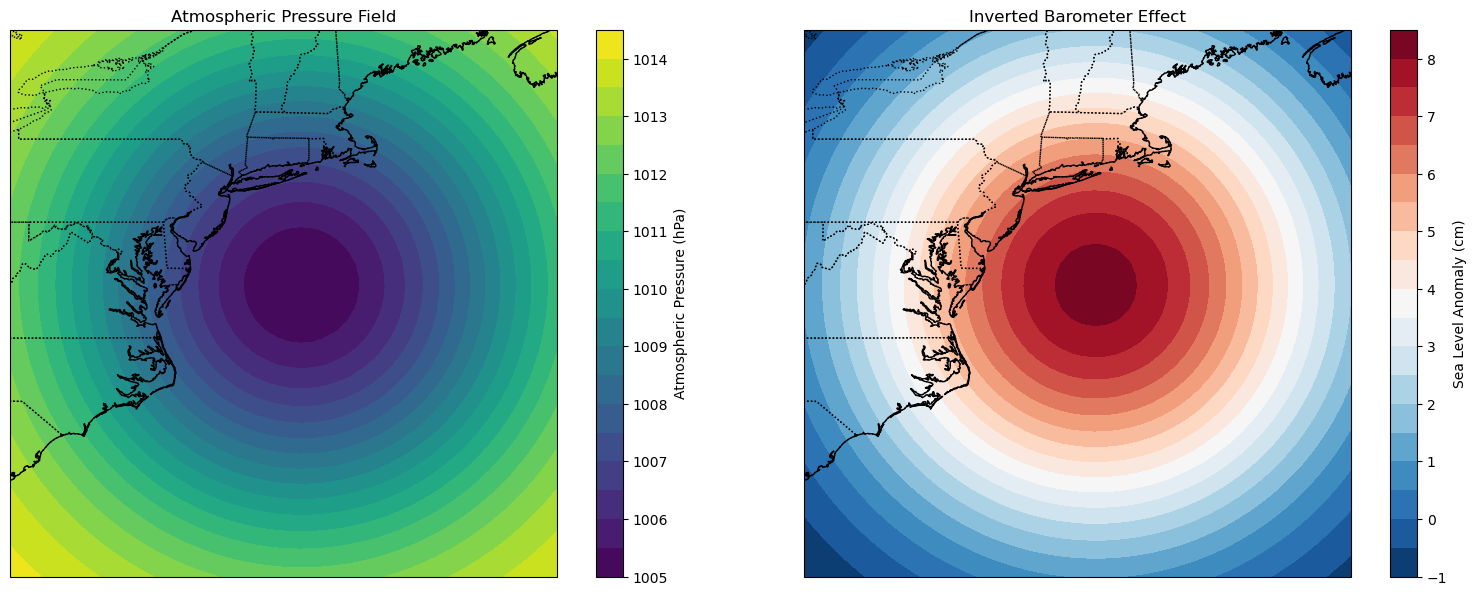


Time Series Statistics:
Maximum sea level rise: 10.65 cm
Maximum sea level fall: -2.37 cm
Standard deviation: 3.47 cm

Spatial Field Statistics:
Maximum sea level rise: 8.25 cm
Maximum sea level fall: -0.98 cm
Standard deviation: 2.32 cm


In [4]:
#
https://github.com/Omcred/Inverted-Barometer-Effect/tree/mainimport numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime, timedelta

def inverted_barometer_effect(atmospheric_pressure, reference_pressure=1013.25):
    """
    Calculate sea level response to atmospheric pressure changes (inverted barometer effect).
    
    Parameters:
    atmospheric_pressure (float or array): Atmospheric pressure in hPa
    reference_pressure (float): Reference pressure (typically mean pressure) in hPa
    
    Returns:
    float or array: Sea level response in cm
    """
    # Standard inverted barometer response: 1 hPa ≈ 1 cm sea level change
    sea_level_response = -(atmospheric_pressure - reference_pressure)
    return sea_level_response

def load_sample_data():
    """Generate sample atmospheric pressure data for demonstration"""
    # Create sample time series
    time = np.arange(datetime(2023, 1, 1), datetime(2023, 1, 31), timedelta(days=1)).astype(datetime)
    
    # Synthetic pressure data (hPa) with a storm event
    pressure = 1010 + 5*np.sin(np.linspace(0, 10*np.pi, len(time))) + np.random.normal(0, 2, len(time))
    
    # Create sample spatial data
    lats = np.linspace(30, 45, 50)
    lons = np.linspace(-80, -65, 50)
    lon_grid, lat_grid = np.meshgrid(lons, lats)
    
    # Synthetic pressure field with a low-pressure system
    pressure_field = 1015 - 10*np.exp(-((lon_grid+72)**2 + (lat_grid-38)**2)/50)
    
    return time, pressure, lats, lons, pressure_field

def plot_ibe_timeseries(time, pressure, ibe):
    """Plot atmospheric pressure and IBE response over time"""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
    ax1.plot(time, pressure, 'b-', label='Atmospheric Pressure')
    ax1.axhline(1013.25, color='k', linestyle='--', label='Reference Pressure')
    ax1.set_ylabel('Pressure (hPa)')
    ax1.set_title('Atmospheric Pressure Time Series')
    ax1.legend()
    ax1.grid(True)
    
    ax2.plot(time, ibe, 'r-', label='IBE Sea Level Response')
    ax2.axhline(0, color='k', linestyle='--')
    ax2.set_ylabel('Sea Level Anomaly (cm)')
    ax2.set_title('Inverted Barometer Effect')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

def plot_ibe_spatial(lons, lats, pressure_field, ibe_field):
    """Plot spatial maps of pressure and IBE response"""
    fig = plt.figure(figsize=(16, 6))
    
    # Plot atmospheric pressure
    ax1 = fig.add_subplot(121, projection=ccrs.PlateCarree())
    contour = ax1.contourf(lons, lats, pressure_field, levels=20, cmap='viridis', transform=ccrs.PlateCarree())
    ax1.add_feature(cfeature.LAND)
    ax1.add_feature(cfeature.COASTLINE)
    ax1.add_feature(cfeature.BORDERS, linestyle=':')
    ax1.add_feature(cfeature.STATES, linestyle=':')
    plt.colorbar(contour, ax=ax1, label='Atmospheric Pressure (hPa)')
    ax1.set_title('Atmospheric Pressure Field')
    
    # Plot IBE response
    ax2 = fig.add_subplot(122, projection=ccrs.PlateCarree())
    contour = ax2.contourf(lons, lats, ibe_field, levels=20, cmap='RdBu_r', transform=ccrs.PlateCarree())
    ax2.add_feature(cfeature.LAND)
    ax2.add_feature(cfeature.COASTLINE)
    ax2.add_feature(cfeature.BORDERS, linestyle=':')
    ax2.add_feature(cfeature.STATES, linestyle=':')
    plt.colorbar(contour, ax=ax2, label='Sea Level Anomaly (cm)')
    ax2.set_title('Inverted Barometer Effect')
    
    plt.tight_layout()
    plt.show()

def main():
    # Load sample data (in practice, you would load real observations or model output)
    time, pressure, lats, lons, pressure_field = load_sample_data()
    
    # Calculate IBE for time series
    ibe_time_series = inverted_barometer_effect(pressure)
    
    # Calculate IBE for spatial field
    ibe_field = inverted_barometer_effect(pressure_field)
    
    # Plot results
    plot_ibe_timeseries(time, pressure, ibe_time_series)
    plot_ibe_spatial(lons, lats, pressure_field, ibe_field)
    
    # Calculate statistics
    print("\nTime Series Statistics:")
    print(f"Maximum sea level rise: {np.max(ibe_time_series):.2f} cm")
    print(f"Maximum sea level fall: {np.min(ibe_time_series):.2f} cm")
    print(f"Standard deviation: {np.std(ibe_time_series):.2f} cm")
    
    print("\nSpatial Field Statistics:")
    print(f"Maximum sea level rise: {np.max(ibe_field):.2f} cm")
    print(f"Maximum sea level fall: {np.min(ibe_field):.2f} cm")
    print(f"Standard deviation: {np.std(ibe_field):.2f} cm")

if __name__ == "__main__":
    main()